In [1]:
import numpy as np

inputs = np.array([3, 5])

inputs

array([3, 5])

In [2]:
weights = {'node_0' : np.array([2, 4]), 'node_1':np.array([4, -5]), 'output':np.array([2, 7])}

In [3]:
node_0_value = np.sum(inputs * weights['node_0'])

node_1_value = np.sum(inputs * weights['node_1'])

layers = [node_0_value, node_1_value]

layers

[np.int64(26), np.int64(-13)]

In [4]:
result = np.sum(layers * weights['output'])

result

np.int64(-39)

In [5]:
relu = lambda i : max(0, i)

node_0_value = relu(np.sum(inputs * weights['node_0']))

node_1_value = relu(np.sum(inputs * weights['node_1']))

layers = [node_0_value, node_1_value]

layers

[np.int64(26), 0]

In [6]:
result = np.sum(layers * weights['output'])

result

np.int64(52)

In [7]:
def neural_network(inputs, weights):
  """
  Forward Propagation
  """
  node_0_value = relu(np.sum(inputs * weights['node_0']))

  node_1_value = relu(np.sum(inputs * weights['node_1']))

  layers = [node_0_value, node_1_value]

  result = np.sum(layers * weights['output'])

  return result

neural_network(inputs, weights)

np.int64(52)

In [8]:
def multilayer_neural_network(inputs, weights):
  """
  Multi Layer Forward Propagation
  """
  node_0_0_value = relu(np.sum(inputs * weights['node_0_0']))

  node_0_1_value = relu(np.sum(inputs * weights['node_0_1']))

  null_layer = [node_0_0_value, node_0_1_value]

  node_1_0_value = relu(np.sum(null_layer * weights['node_1_0']))

  node_1_1_value = relu(np.sum(null_layer * weights['node_1_1']))

  layers = [node_1_0_value, node_1_1_value]

  result = np.sum(layers * weights['output'])

  return result

weights = {'node_0_0': np.array([2, 4]), 'node_0_1': np.array([ 4, -5])}

weights['node_1_0'] = np.array([-1,  2]); weights['node_1_1'] = np.array([1, 2])

weights['output'] = np.array([2, 7])

multilayer_neural_network(inputs, weights)

np.int64(182)

In [9]:
inputs = np.array([0, 3])

weights = {'node_0': np.array([2, 1]), 'node_1': np.array([1, 2]), 'output': np.array([1, 1])}

result = neural_network(inputs, weights)

result

np.int64(9)

In [10]:
label = 3

error = result - label

error

np.int64(6)

In [11]:
weights = {'node_0': np.array([2, 1]), 'node_1': np.array([1, 0]), 'output': np.array([1, 1])}

result = neural_network(inputs, weights)

error = result - label

error

np.int64(0)

In [12]:
multiples = [np.array([0, 3]), np.array([1, 2]), np.array([-1, -2]), np.array([4, 0])]

weights = {'node_0': np.array([2, 1]), 'node_1': np.array([1, 2]), 'output': np.array([1, 1])}

result = [neural_network(input, weights) for input in multiples]

result

[np.int64(9), np.int64(9), np.int64(0), np.int64(12)]

In [13]:
from sklearn.metrics import mean_squared_error

labels = [1, 3, 5, 7]

mean_squared_error(result, labels)

37.5

In [15]:
weights = {'node_0': np.array([2, 1]), 'node_1': np.array([1, 1.5]), 'output': np.array([1, 1.5])}

result = [neural_network(input, weights) for input in multiples]

mean_squared_error(result, labels)

49.890625

In [16]:
input = np.array([1, 2, 3])

weights = np.array([0, 2, 1])

target = 0

In [17]:
preds = (weights * input).sum()

error = preds - target

slope = 2 * input * error

slope

array([14, 28, 42])

In [18]:
learning_rate = 0.01

preds = (weights * input).sum()

error = preds - target

slope = 2 * input * error

weights = weights - (learning_rate * slope)

weights

array([-0.14,  1.72,  0.58])

In [19]:
error

np.int64(7)

In [20]:
logits = (weights * input).sum()

error = logits - target

error

np.float64(5.04)

In [21]:
import matplotlib.pyplot as plt

inputs = np.array([1, 2, 3])

weights = np.array([-0.49929916,  1.00140168, -0.49789747])

target = 0

In [22]:
def return_slope(input, weights, target):
  """
  Get Slope
  """
  logits = (weights * input).sum()

  error = logits - target

  slope = 2 * input * error

  return slope

In [23]:
def compute_loss(input, weights, target):
  """
  Get Loss
  """
  logits = (weights * input).sum()

  return logits - target

In [24]:
loops = 20

errors = []

for i in range(loops):

  slope = return_slope(inputs, weights, target)

  weights = weights - (0.01 * slope)

  errors.append(compute_loss(inputs, weights, target))

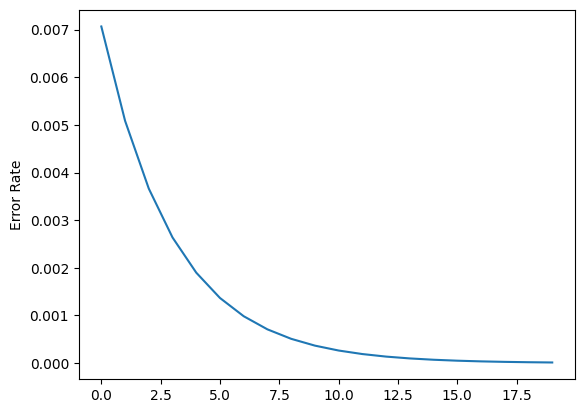

In [25]:
plt.plot(errors)

plt.ylabel('Error Rate');